In [41]:
import sympy
from sympy.solvers import solve
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# On/off problem

We want to try to measure a signal process, but we know the data also contains backgrounds. Theory tells us to expect $s$ signal events and $b$ background events.

We perform two counting measurements:

- One where we expect both signal and backgrounds to contribute. We obtain $n_{on}$ events from our experiment. Our model is a simple Poisson model 

    $$
    p(n_{on} | \mu,\nu) = \text{Pois}(n_{on} | \mu s + \nu b ).
    $$

    Here $\mu$ is our POI and $\nu$ is a nuisance parameter. 

- In the second experiment we tune it such that only backgrounds contribute. This is usually known as a control region, which helps us to constrain the amount of background present in $n_{on}$. We obtain $n_{off}$ events from our experiment. Our model is another simple Poisson model with an expectation of 
  
    $$
    p(n_{off} | \nu) = \text{Pois}(n_{off} | \nu b ).
    $$

The total likelihood is then 

$$
L(\mu, \nu ) = p(n_{on} | \mu,\nu) p(n_{off} | \nu) = \text{Pois}(n_{on} | \mu s + \nu b ) \text{Pois}(n_{off} | \nu b )
$$

In [56]:
non, noff = sympy.symbols("n_on n_off")
s, b = sympy.symbols("s b")
mu, nu = sympy.symbols("mu nu")

In [62]:
L = (mu * s + nu * b)**(non) * sympy.exp(-mu*s-nu*b) / sympy.factorial(non) * (nu * b)**noff * sympy.exp(-nu*b) / sympy.factorial(noff)
L

(b*nu)**n_off*(b*nu + mu*s)**n_on*exp(-b*nu)*exp(-b*nu - mu*s)/(factorial(n_off)*factorial(n_on))

In [59]:
mu_hat = solve(sympy.diff(L, mu), mu)[0]
nu_hat = solve(sympy.diff(L.subs(mu, mu_hat), nu), nu)[0]

mu_hat = mu_hat.subs(nu, nu_hat)

In [60]:
mu_hat

(-n_off + n_on)/s

In [61]:
nu_hat

n_off/b

In [68]:
nu_hathat = solve(sympy.diff(L, nu), nu)[1]
nu_hathat

(-2*mu*s + n_off + n_on + sqrt(4*mu**2*s**2 + 4*mu*n_off*s - 4*mu*n_on*s + n_off**2 + 2*n_off*n_on + n_on**2))/(4*b)

In [69]:
LR = L.subs(nu, nu_hathat) / L.subs({mu: mu_hat, nu: nu_hat})
LR = LR.subs({s: 10, b: 50, non: 70, noff: 50})
NNL = -2* sympy.ln(LR)


LR = sympy.lambdify(mu, LR)
NNL = sympy.lambdify(mu, NNL)

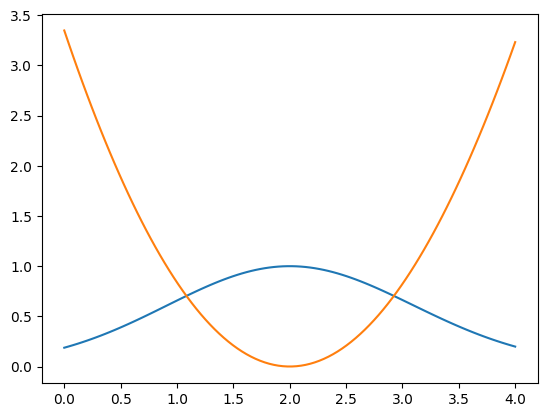

In [70]:
mu_scan = np.linspace(0, 4, 100)
plt.plot(mu_scan, LR(mu_scan))
plt.plot(mu_scan, NNL(mu_scan))

In [71]:
sp.optimize.minimize(NNL, 1)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.220446049250313e-16
        x: [ 2.000e+00]
      nit: 3
      jac: [-4.470e-08]
 hess_inv: [[ 6.001e-01]]
     nfev: 8
     njev: 4